# __EDA-Customer-Churn-Analysis__

First we will import some library that helps us to do analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Now we import the dataset (csv file) to do analysis.
df = pd.read_csv("Customer-Churn-Records.csv")

In [3]:
#Preview of some data
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


Here, Exited = 1 churn (leave the organization), 0 means retained

Checking for total rows and columns in the dataset.

In [4]:
data_str = df.shape
data_str

(10000, 18)

So we have total 10000 rows and 18 columns 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Creating a copy of a dataset is a good practice for data analyst. so we make a copy of our dataset df

In [6]:
df1 = df.copy()

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Now we will check the null values in dataset if any, either we need to remove or fill with useful values.

In [8]:
missing_data = df.isnull().sum()
missing_data

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

As we can see there is no null values present in our dataset.

In [9]:
# The distribution of churned vs. non-churned customers?
customer_churn_count = df.groupby("Exited")["CustomerId"].count().reset_index()
customer_churn_count

,Exited,CustomerId
0,0,7962
1,1,2038


In [10]:
px.pie(customer_churn_count, names = "Exited", values = "CustomerId", title=" Distribution of Churn and Non-churn customer", 
       color_discrete_sequence=["#239BA7", "#F08B51"])


The analysis reveals that approximately 20.4% of customers have churned, indicating that nearly one-fifth of the customer base has discontinued their relationship with the company.

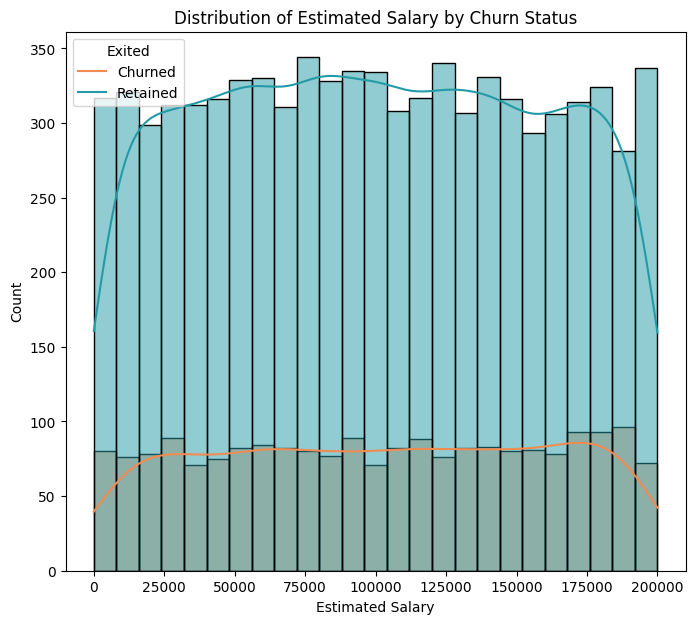

In [11]:
# The distribution of EstimatedSalary of churned and retained Customers.
plt.figure(figsize=(8,7))
colors= [ "#239BA7", "#F08B51"]
sns.histplot(data = df, x = "EstimatedSalary", hue = "Exited",  kde=True, bins=25, palette = colors)
plt.title("Distribution of Estimated Salary by Churn Status")
plt.xlabel("Estimated Salary")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["Churned", "Retained"])
plt.show()

The salary distribution is roughly similar for both churned and retained customers, indicating that salary does not strongly influence churn.
churning occurs in every salary range, indicating that salary does not strongly influence the churn

In [12]:
# How do churn rates vary by Gender, Geography, and IsActiveMember?
gender_churn_rate = df.groupby(["Gender", "Geography", "IsActiveMember"])["Exited" ].sum().reset_index()
gender_churn_rate

,Gender,Geography,IsActiveMember,Exited
0,Female,France,0,288
1,Female,France,1,172
2,Female,Germany,0,283
3,Female,Germany,1,165
4,Female,Spain,0,154
5,Female,Spain,1,77
6,Male,France,0,225
7,Male,France,1,126
8,Male,Germany,0,235
9,Male,Germany,1,131


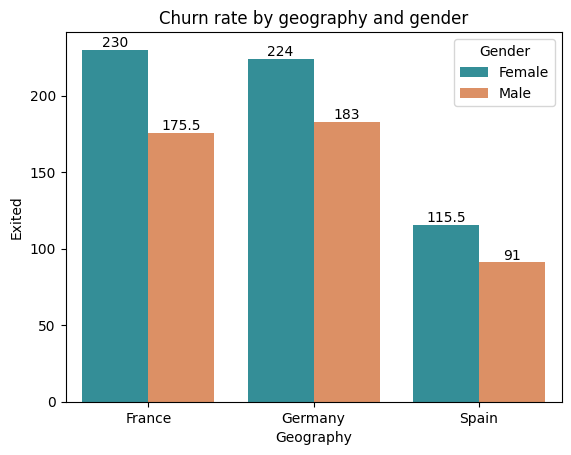

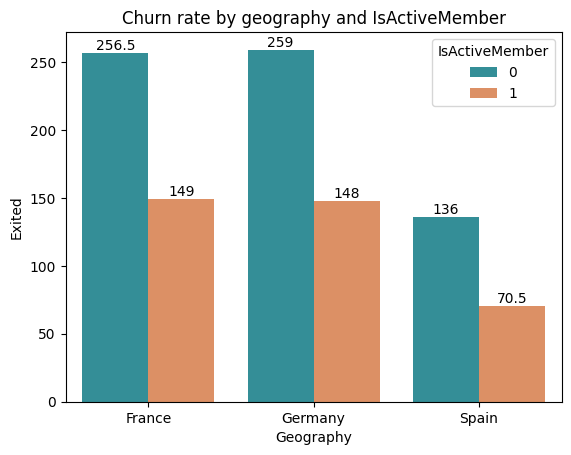

In [13]:
colors= ["#239BA7", "#F08B51"]
ax = sns.barplot(gender_churn_rate, x="Geography", y = "Exited", hue="Gender", palette = colors, errorbar=None)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn rate by geography and gender")
plt.show()

ax = sns.barplot(gender_churn_rate, x="Geography", y = "Exited", hue="IsActiveMember", palette = colors, errorbar=None)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn rate by geography and IsActiveMember")
plt.show()

The overall churn rate in France is higher compared to Germany and Spain. Across all countries, female customers are more likely to churn than males. The second bar chart reveals that inactive members show a significantly higher churn tendency than active ones. These insights suggest that the organization should introduce new engagement schemes or retention plans to improve customer loyalty and reduce churn.

 what is the average CreditScore, Balance, and EstimatedSalary of churned vs. retained customers.

In [14]:
avg_credit_balance = df.groupby(["Exited"])[["CreditScore", "Balance", "EstimatedSalary"]].mean().reset_index()
avg_credit_balance 

,Exited,CreditScore,Balance,EstimatedSalary
0,0,651.837855,72742.750663,99726.853141
1,1,645.414622,91109.476006,101509.908783


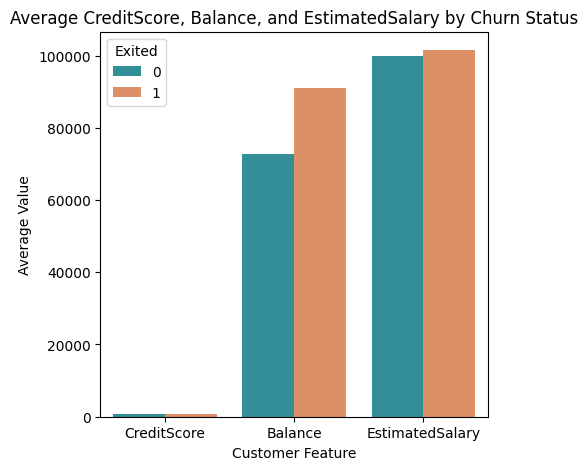

In [15]:
plt.figure(figsize=(5, 5))
colors= [ "#239BA7", "#F08B51"]
avg_credit_balance = avg_credit_balance.melt(id_vars="Exited", var_name="Feature", value_name= "Average_Value")
sns.barplot(data= avg_credit_balance , x= "Feature", y="Average_Value", hue="Exited", palette = colors)
plt.title("Average CreditScore, Balance, and EstimatedSalary by Churn Status")
plt.xlabel("Customer Feature")
plt.ylabel("Average Value")
plt.show()


Churned customers have a slightly lower average CreditScore and higher average Balance compared to retained ones, suggesting that customers with higher outstanding balances may be more prone to churn.The bank might focus on customers with high balances but lower credit scores, as they seem more likely to churn.

How does Age impact churn? Plot histograms and boxplots for churned and non-churned groups.

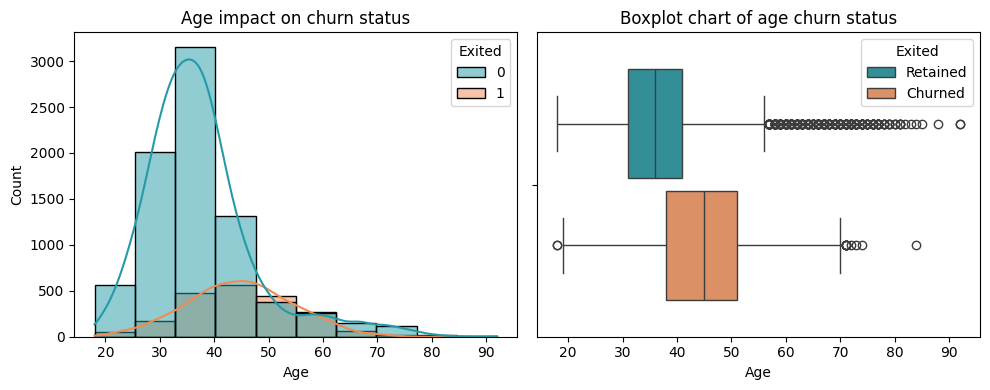

In [16]:
colors= ["#239BA7", "#F08B51"]
fig, axes = plt.subplots(1, 2, figsize =(10, 4))
sns.histplot(data=df, x= "Age", bins=10, palette = colors, hue ="Exited", kde=True, ax = axes[0])
axes[0].set_title("Age impact on churn status")

sns.boxplot(data = df, x = "Age", hue = "Exited", gap=.1, palette = colors, ax=axes[1])
axes[1].set_title("Boxplot chart of age churn status")
plt.legend(title="Exited", labels=["Retained", "Churned"])
plt.tight_layout()
plt.show()

In histogram plot, Churn rate increases with age up to mid-40s, suggesting middle-aged customers are more likely to churn. and in boxplot, Older or middle-aged customers are more prone to churn, whereas younger customers tend to stay longer. 

Is there any correlation among numeric features like CreditScore, Balance and EstimatedSalary?

In [17]:
corr_data = df.corr(numeric_only=True)
corr_data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016140,-0.016957,0.009289,0.002360
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006203,-0.007293,-0.000865,-0.013076
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515


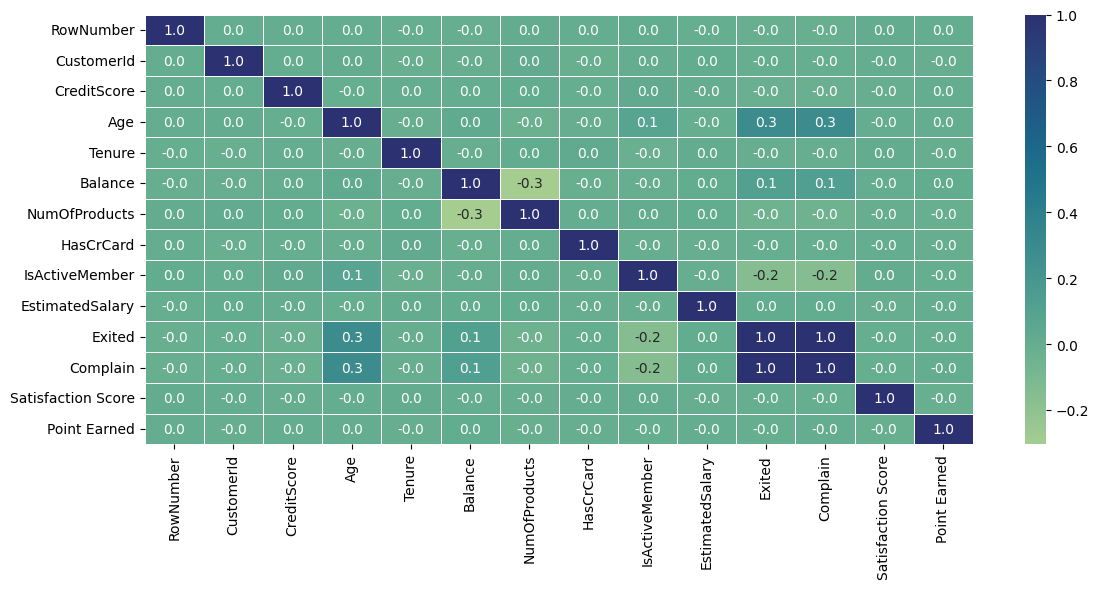

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_data, annot=True, cmap="crest", fmt=".1f" , linewidth=.5)
plt.tight_layout()
plt.show()

From the heatmap analysis, no significant correlation is observed among most numerical features. However, the ‘Complain’ variable shows a strong positive relationship with customer churn, indicating that customers who raise complaints are more likely to leave. Other features like credit score, tenure, number of product has no relation.

Are there outliers in Balance, CreditScore, or Age that are mostly associated with churn?

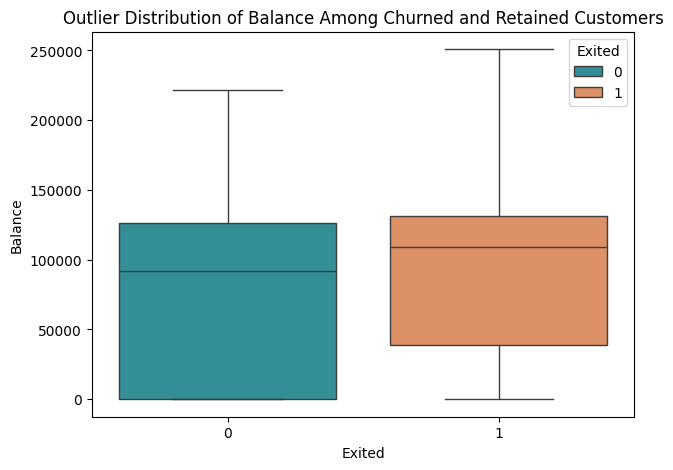

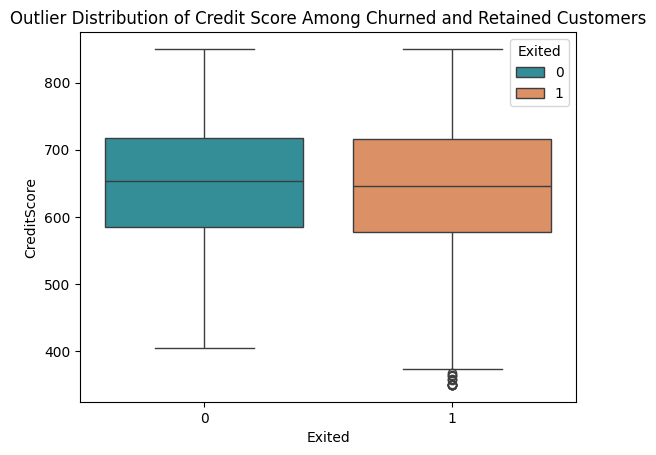

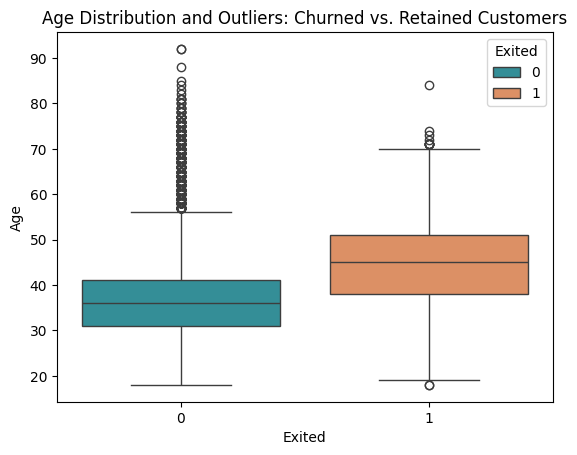

In [19]:
plt.figure(figsize=(7, 5))
colors= ["#239BA7", "#F08B51"]
sns.boxplot(data=df,x= "Exited", y="Balance", palette = colors, hue = "Exited")
plt.title("Outlier Distribution of Balance Among Churned and Retained Customers")
plt.show()

sns.boxplot(x='Exited', y='CreditScore', data=df, palette = colors, hue = "Exited")
plt.title("Outlier Distribution of Credit Score Among Churned and Retained Customers")
plt.show()

sns.boxplot(x='Exited', y='Age', data=df, palette = colors, hue = "Exited")
plt.title("Age Distribution and Outliers: Churned vs. Retained Customers")
plt.show()

Balance does not significantly influence churn; both groups have similar distributions.Customers with poor credit scores are slightly more likely to churn,Older customers tend to remain loyal, while churned customers are mostly within typical age ranges — age extremes may not drive churn.

Group customers into age brackets (e.g.,18-30 as Adults, 30-50 as middle age and 50-100 as seniors.) How does churn rate change across them?

In [20]:
#First we create a new age_group columns based on age column.
def Age_group(Age):
    if Age < 30 :
        return "Adults"
    elif Age < 50 :
        return "Middle-age"
    else:
        return "Senior"
df["Age_group"] = df["Age"].apply(Age_group)


In [21]:
#Let us check if our new columns create successfully or not.
df[["Age", "Age_group"]].head(10)

,Age,Age_group
0,42,Middle-age
1,41,Middle-age
2,42,Middle-age
3,39,Middle-age
4,43,Middle-age
5,44,Middle-age
6,50,Senior
7,29,Adults
8,44,Middle-age
9,27,Adults


Now we will see the churn status based on age_group by visualization

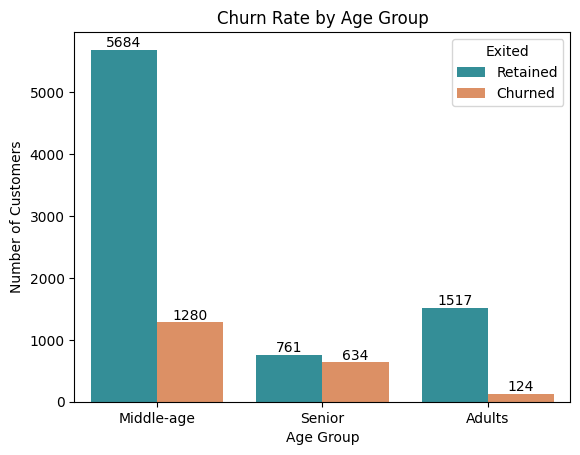

In [22]:
colors= ["#239BA7", "#F08B51"]
ax = sns.countplot(data=df, x="Age_group", hue="Exited", palette=colors)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.legend(title="Exited" , labels=["Retained", "Churned"])
plt.show()

From the analysis, it’s clear that the middle-aged segment shows the highest churn, with around 1,280 customers leaving compared to 5,684 retained — a significant gap that calls for attention.
Interestingly, while young adults have the lowest churn rate with 124, the senior customers show an almost equal split between churned and retained user.This trend suggests that organizations should focus on building loyalty programs and engagement strategies specifically tailored to senior customers, ensuring long-term retention and trust.

Are customers with only one product (NumOfProducts = 1) more likely to churn than those with multiple?

In [23]:
Num_product_churn = df.groupby("NumOfProducts")["Exited"].sum().reset_index()
Num_product_churn

,NumOfProducts,Exited
0,1,1409
1,2,349
2,3,220
3,4,60


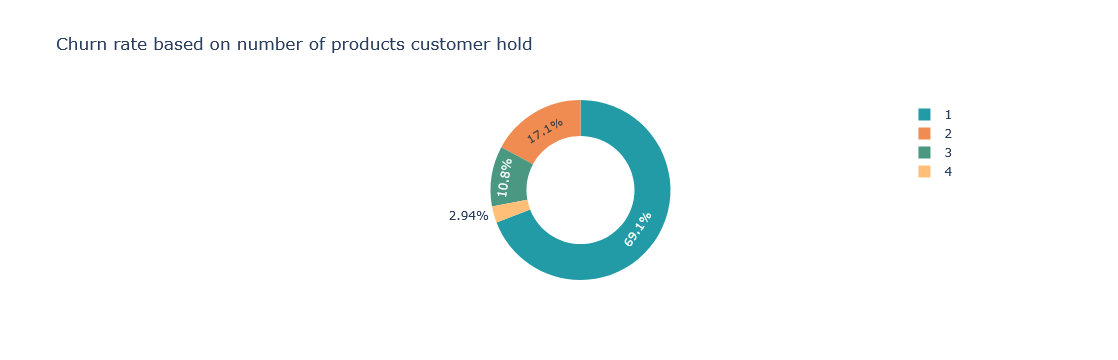

In [24]:
px.pie(Num_product_churn, names ="NumOfProducts", values="Exited",hole = 0.6,  title = "Churn rate based on number of products customer hold", color_discrete_sequence= ["#239BA7", "#F08B51", "#4A9782", "#FFBF78"])

From the analysis, it’s clear that customers holding only one product have the highest churn rate (69.1%), compared to those with two products (17.1%), three products (10.8%), and four products (just 2.94%).This trend suggests that single-product customers may be on high-cost or restrictive plans, prompting them to discontinue their association with the organization.